In [ ]:
print("test")

test


In [ ]:
import easyocr
import matplotlib.pyplot as plt
import cv2
from PIL import Image, ImageDraw, ImageFont

# EasyOCR 리더 초기화 (예: 영어와 한국어 지원)
reader = easyocr.Reader(['en', 'ko'] , gpu=True)

# 이미지 파일 경로
# img_path = 'ts_png.png'
img_path = 'image00001.jpg'


# 이미지 읽기
result = reader.readtext(img_path)

# 결과 출력
for (bbox, text, prob) in result:
    print(f'Text: {text}, Probability: {prob}')

# PIL 이미지를 사용하여 이미지 로드
image = Image.open(img_path).convert("RGB")
draw = ImageDraw.Draw(image)

# 한글 폰트를 사용하여 텍스트 표시 (예: 'malgun.ttf' 폰트를 사용하는 경우)
# 시스템에 설치된 폰트를 사용할 수도 있습니다.
font_path = 'NanumGothic.ttf'
font = ImageFont.truetype(font_path, 20)

# 텍스트 박스 및 인식 결과 표시
for (bbox, text, prob) in result:
    # 텍스트 박스 좌표
    top_left = tuple(map(int, bbox[0]))
    bottom_right = tuple(map(int, bbox[2]))
    # 박스 그리기
    draw.rectangle([top_left, bottom_right], outline=(0, 255, 0), width=2)
    # 텍스트 표시
    draw.text(top_left, text, font=font, fill=(255, 0, 0))

# 이미지 표시
plt.figure(figsize=(10, 10))
plt.imshow(image)
plt.title('OCR Result')
plt.axis('off')

# 결과 이미지 저장
output_image_path = 'ocr_result.png'
plt.savefig(output_image_path, bbox_inches='tight')

plt.show()


Neither CUDA nor MPS are available - defaulting to CPU. Note: This module is much faster with a GPU.


In [ ]:
import easyocr
import matplotlib.pyplot as plt
from PIL import Image, ImageDraw, ImageFont

# EasyOCR 리더 초기화 (예: 영어와 한국어 지원)
reader = easyocr.Reader(['en', 'ko'], gpu=False)

# 이미지 파일 경로
img_path = 'ts_png.png'

# 이미지 읽기
result = reader.readtext(img_path)

# 결과 출력
for (bbox, text, prob) in result:
    print(f'Text: {text}, Probability: {prob}')

# 텍스트 박스 합병 함수
def merge_text_boxes(results, threshold=10):
    merged_boxes = []
    current_box = results[0][0]
    for i in range(1, len(results)):
        next_box = results[i][0]
        # 텍스트 박스 사이의 거리가 일정 이하이면 합병
        if abs(next_box[0][1] - current_box[2][1]) < threshold:
            current_box = [
                (min(current_box[0][0], next_box[0][0]), min(current_box[0][1], next_box[0][1])),
                (max(current_box[1][0], next_box[1][0]), min(current_box[1][1], next_box[1][1])),
                (max(current_box[2][0], next_box[2][0]), max(current_box[2][1], next_box[2][1])),
                (min(current_box[3][0], next_box[3][0]), max(current_box[3][1], next_box[3][1]))
            ]
        else:
            merged_boxes.append(current_box)
            current_box = next_box
    merged_boxes.append(current_box)
    return merged_boxes

# PIL 이미지를 사용하여 이미지 로드
image = Image.open(img_path).convert("RGB")
draw = ImageDraw.Draw(image)

# 한글 폰트를 사용하여 텍스트 표시 (예: 'NanumGothic.ttf' 폰트를 사용하는 경우)
# 시스템에 설치된 폰트를 사용할 수도 있습니다.
font_path = 'NanumGothic.ttf'
font = ImageFont.truetype(font_path, 20)

# 합병된 텍스트 박스 및 인식 결과 표시
merged_boxes = merge_text_boxes(result)

for bbox in merged_boxes:
    # 텍스트 박스 좌표
    top_left = tuple(map(int, bbox[0]))
    bottom_right = tuple(map(int, bbox[2]))
    # 박스 그리기
    draw.rectangle([top_left, bottom_right], outline=(0, 255, 0), width=2)

# 이미지 표시
plt.figure(figsize=(10, 10))
plt.imshow(image)
plt.title('OCR Result')
plt.axis('off')

# 결과 이미지 저장
output_image_path = 'ocr_result.png'
plt.savefig(output_image_path, bbox_inches='tight')

plt.show()


Using CPU. Note: This module is much faster with a GPU.


Text: 고, Probability: 0.8706520007481231
Text: 한, Probability: 0.7200058826697529
Text: 등, Probability: 0.3640560173426053
Text: 보, Probability: 0.9999153631953419
Text: 여, Probability: 0.8086922111161243
Text: 다, Probability: 0.9999465949513251
Text: 반, Probability: 0.9862974266350335
Text: 조, Probability: 0.9092675696536077
Text: *, Probability: 0.026320506835340263
Text: 꿈, Probability: 0.026454476063250354
Text: 8, Probability: 0.03262676568437062
Text: 군, Probability: 0.31764180644154294
Text: 군, Probability: 0.2860938538607485
Text: Hi, Probability: 0.22493136251222276
Text: 근, Probability: 0.24861382405944799
Text: 간, Probability: 0.3640682450989061
Text: 근, Probability: 0.8471922711525828
Text: 로, Probability: 0.9526999363429809
Text: 백, Probability: 0.9287474378732128
Text: 의, Probability: 0.9561703786158979
Text: 로, Probability: 0.9260398788950717
Text: 과, Probability: 0.9996781608174956
Text: 군, Probability: 0.6321143043352642
Text: 보, Probability: 0.9993545858705524
Text: 모

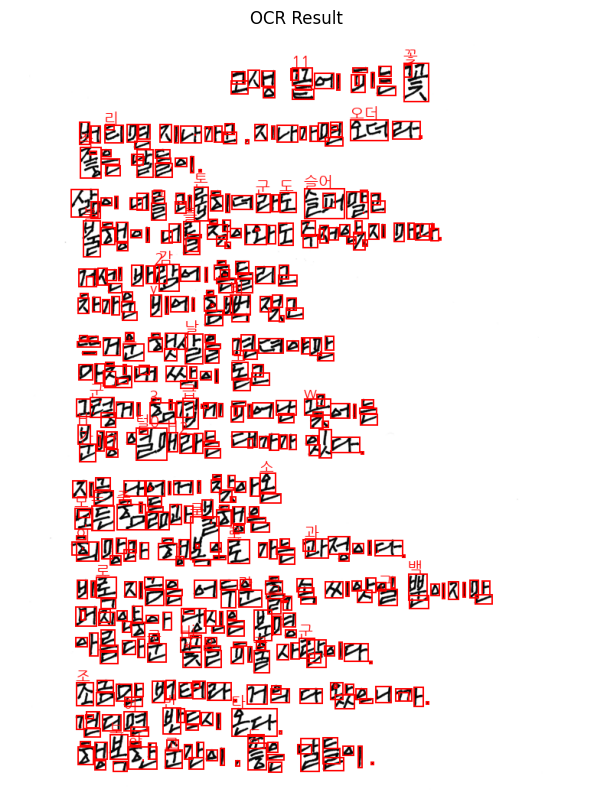

In [3]:
import easyocr
import matplotlib.pyplot as plt
from PIL import Image, ImageDraw, ImageFont
import cv2
import numpy as np

# EasyOCR 리더 초기화 (예: 영어와 한국어 지원)
reader = easyocr.Reader(['en', 'ko'], gpu=False)

# 이미지 파일 경로
img_path = 'ts_png.png'

# 이미지 읽기
image = Image.open(img_path).convert("RGB")
image_np = np.array(image)

# 텍스트 영역 탐지 (가우시안 블러 + Canny 엣지 검출 사용)
gray = cv2.cvtColor(image_np, cv2.COLOR_RGB2GRAY)
blurred = cv2.GaussianBlur(gray, (5, 5), 0)
edged = cv2.Canny(blurred, 50, 150)

# 컨투어 찾기
contours, _ = cv2.findContours(edged, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

# 탐지된 텍스트 영역에 박스 그리기
draw = ImageDraw.Draw(image)

# 한글 폰트를 사용하여 텍스트 표시 (예: 'NanumGothic.ttf' 폰트를 사용하는 경우)
font_path = 'NanumGothic.ttf'
font = ImageFont.truetype(font_path, 20)

# 각 텍스트 박스에 대해 OCR 수행
for contour in contours:
    x, y, w, h = cv2.boundingRect(contour)
    # 박스 그리기
    draw.rectangle([(x, y), (x+w, y+h)], outline=(255, 0, 0), width=2)
    
    # 박스 내의 영역을 잘라 OCR 수행
    cropped_image = image_np[y:y+h, x:x+w]
    result = reader.readtext(cropped_image)
    
    for (bbox, text, prob) in result:
        print(f'Text: {text}, Probability: {prob}')
        # 텍스트 표시
        draw.text((x, y-20), text, font=font, fill=(255, 0, 0))

# 이미지 표시
plt.figure(figsize=(10, 10))
plt.imshow(image)
plt.title('OCR Result')
plt.axis('off')

# 결과 이미지 저장
output_image_path = 'ocr_result.png'
plt.savefig(output_image_path, bbox_inches='tight')

plt.show()


Using CPU. Note: This module is much faster with a GPU.


Text: 고생 끝에 피눈 꽃, Probability: 0.4566930652871311
Text: 버티편 지나가고 , 지나가면 오더라;, Probability: 0.5280805341821505
Text: 좋음 달들이., Probability: 0.3336714030910532
Text: 삼이 너들 괴롭되더라도 슬퍼말고, Probability: 0.06232974176210143
Text: 불t이 너름찾아와도 주저앉지 마과:, Probability: 0.3245610955820761
Text: 거센 바람어 /들리고, Probability: 0.21186171880222696
Text: 차가운, Probability: 0.7890646457672119
Text: 비어, Probability: 0.15082864455626846
Text: 콤뼈 젖고, Probability: 0.053735705811555984
Text: 또M훈 햇살들 견드야판, Probability: 0.011676960792490964
Text: 마침내 싸시 돈고, Probability: 0.7394675310529625
Text: 1렇거 힘겹거 피어난 꽂쎄눈, Probability: 0.045084381382927856
Text: 분명 열매라는 대가가 잇다:, Probability: 0.2259178223795365
Text: 지금 나얻거 찾아온, Probability: 0.18118025747968708
Text: 모든, Probability: 0.979768617571093
Text: '힘탁과 불행은, Probability: 0.03188859209071805
Text: 희망과 해복스로 가능 과정이다:, Probability: 0.261946213209709
Text: 비록 진금은 어두운흙 속 씨앗일 뿐이지판, Probability: 0.18443598180415835
Text: 머칠요앙 당신은 분명, Probability: 0.017351675631941583
Text: 아름다운 꽂들

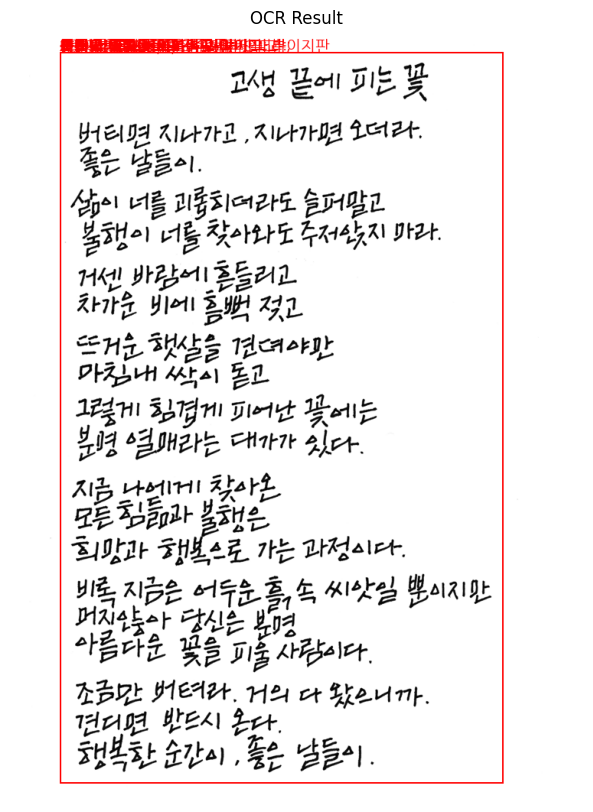

In [4]:
import easyocr
import matplotlib.pyplot as plt
from PIL import Image, ImageDraw, ImageFont
import cv2
import numpy as np

# EasyOCR 리더 초기화 (예: 영어와 한국어 지원)
reader = easyocr.Reader(['en', 'ko'], gpu=False)

# 이미지 파일 경로
img_path = 'ts_png.png'

# 이미지 읽기
image = Image.open(img_path).convert("RGB")
image_np = np.array(image)

# 텍스트 영역 탐지 (가우시안 블러 + Canny 엣지 검출 사용)
gray = cv2.cvtColor(image_np, cv2.COLOR_RGB2GRAY)
blurred = cv2.GaussianBlur(gray, (5, 5), 0)
edged = cv2.Canny(blurred, 50, 150)

# 모폴로지 연산을 통해 컨투어 병합
kernel = cv2.getStructuringElement(cv2.MORPH_RECT, (15, 15))
morphed = cv2.dilate(edged, kernel, iterations=2)

# 컨투어 찾기
contours, _ = cv2.findContours(morphed, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

# 탐지된 텍스트 영역에 박스 그리기
draw = ImageDraw.Draw(image)

# 한글 폰트를 사용하여 텍스트 표시 (예: 'NanumGothic.ttf' 폰트를 사용하는 경우)
font_path = 'NanumGothic.ttf'
font = ImageFont.truetype(font_path, 20)

# 각 텍스트 박스에 대해 OCR 수행
for contour in contours:
    x, y, w, h = cv2.boundingRect(contour)
    # 박스 그리기
    draw.rectangle([(x, y), (x+w, y+h)], outline=(255, 0, 0), width=2)
    
    # 박스 내의 영역을 잘라 OCR 수행
    cropped_image = image_np[y:y+h, x:x+w]
    result = reader.readtext(cropped_image)
    
    for (bbox, text, prob) in result:
        print(f'Text: {text}, Probability: {prob}')
        # 텍스트 표시
        draw.text((x, y-20), text, font=font, fill=(255, 0, 0))

# 이미지 표시
plt.figure(figsize=(10, 10))
plt.imshow(image)
plt.title('OCR Result')
plt.axis('off')

# 결과 이미지 저장
output_image_path = 'ocr_result.png'
plt.savefig(output_image_path, bbox_inches='tight')

plt.show()


In [42]:
import easyocr
import matplotlib.pyplot as plt
from PIL import Image, ImageDraw, ImageFont
import cv2
import numpy as np

# # EasyOCR 리더 초기화 (예: 영어와 한국어 지원)
# reader = easyocr.Reader(['en', 'ko'], gpu=False)

# CRAFT 탐지 모델과 기본 인식 모델을 사용하는 리더
reader = easyocr.Reader(['en', 'ko'], detector='craft', recognizer='standard', gpu=False)

# # DB 탐지 모델과 경량 인식 모델을 사용하는 리더
# reader_lite = easyocr.Reader(['en', 'ko'], detector='db', recognizer='lite', gpu=False)

# 이미지 파일 경로
img_path = 'font_im.png'

Using CPU. Note: This module is much faster with a GPU.


국가보훈부가 지방자치단체에계 6-25전쟁 및 월남전 참전유공자의 참전수당 기준올 권고하는 법 개정안을 추진한
다. 지자체별로 지급액이 달라 불거진 형평성 문제름 줄이기 위해서다.
국가보훈부는 이 같은 내용올 담은 국가보훈기본법 개정안을 다음달 14일까지 입법예고하다고 4일 밝혀다.
개정안은 보훈부가 보훈수당에 대한 가이드라인을 마련하고 이름 지자체장에계 이행하도록 권고 할 수 잎게 햇다.
지자체장은 보훈부의 권고 수용 여부름 보훈처 장관에계 보고하도록 햇다.
보훈부는 65세 이상 참전유공자에게 참전 수당올 지급하다. 이와 별도로 각 지자체는 개별 조레에 따라 참전 수당올
지급하는데, 지역에 따라 지급액이 다르다. 6월 기준 충남 서산시에 사능 유공자는 월 60만원올 받흔다. 반면 경기
김포시에 사는 유공자는 8만3000원올 받는다.
보훈부는 이번 입법예고에 대한 국민 의견올 수렵한 뒤, 국무회의 의결을 거처 올해 9월 국회에 개정안을 제출할
계획이다


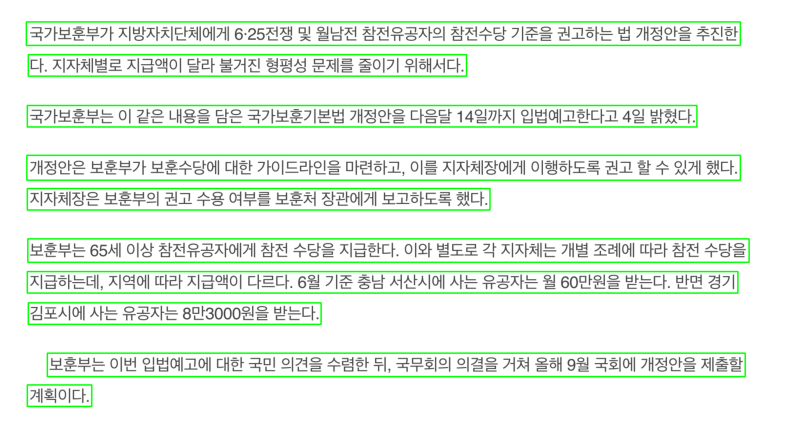

In [37]:
# OpenCV를 사용하여 이미지 읽기 (기본적으로 BGR 형식)
image_bgr = cv2.imread(img_path)

# # BGR에서 RGB로 변환
# image_rgb = cv2.cvtColor(image_bgr, cv2.COLOR_BGR2RGB)

# EasyOCR을 사용하여 텍스트 인식
result = reader.readtext(image_bgr)
# result = reader_lite.readtext(image_bgr)


# 텍스트와 위치를 이미지에 표시
for (bbox, text, prob) in result:
    # bbox는 네 개의 좌표 (top_left, top_right, bottom_right, bottom_left)로 구성됨
    (top_left, top_right, bottom_right, bottom_left) = bbox
    # bbox를 기준으로 사각형 그리기
    cv2.rectangle(image_bgr, tuple(map(int, top_left)), tuple(map(int, bottom_right)), (0, 255, 0), 2)
    print(text)

# 이미지를 matplotlib을 사용하여 표시
plt.figure(figsize=(10, 10))
plt.imshow(image_bgr)
plt.axis('off')
plt.show()


국가보롭부가 제방자-켓않터에계 6.인5젠쟁 및 월밝전 챔젠유공--에 춥젠부당 깨출올 z고하늘 뱀 깨정인올 출잡한
다 지실별로 제급액에 달래 불째i 형평성 문제출 출어해 웨해세다
국가보롭부늄 @ 킬음 내용올 @은 국가보롭기본법 깨정안올 대올말 기 4월깨지 입햄예터하다꽤 삭일 r험다
해정인은 보롭튼가 보흡수당에 때한 가애드라인올 마련해고; @름 제재벽장예체
행하도록 렌b 활 수 엎페 햇다.
재체체장은 보훈부에 권고 수용 예측록 보롭체 장관애터 보고하도록 햇다.
보훈부는 65세 @상 챔전유공지예제 챔젠 수당올 제롭하다. @외 별도로 각 제자되는 깨별 조례예 따라 챔전 수당올
제급히눈하 제역에 때라 제름액이 때르다 @월 깨준 충헤 세산세에 사분 유공-눈 월 @@만월올 발문- 반면 평기
캠로서에 씨늘 유공짜늘 @만SO@@웬올 발늘다.
보롭부는 @번 엘랜예고예 대한 국맨 의견올 수렵한 튀 국편회의 의결올 폐체 올해
월 국회에 패정안올 제출활
폐<에다


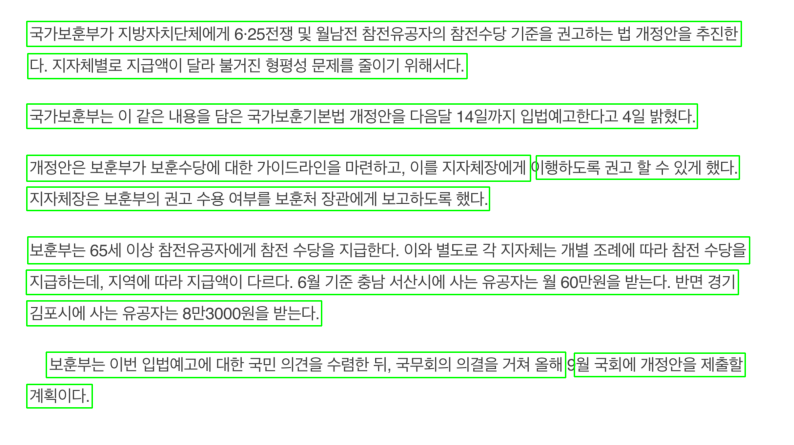

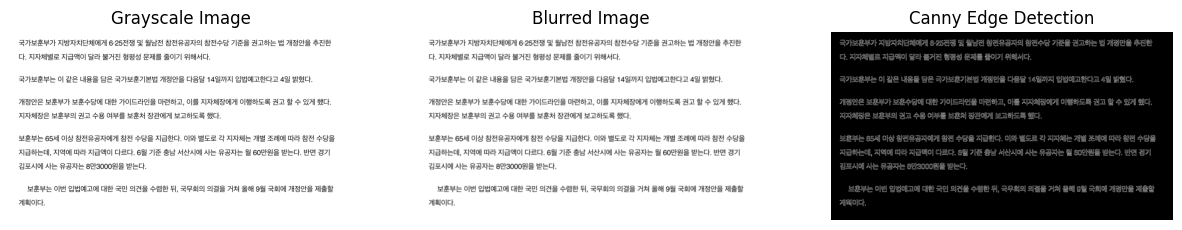

In [40]:
# OpenCV를 사용하여 이미지 읽기 (기본적으로 BGR 형식)
image_bgr = cv2.imread(img_path)

# Grayscale 변환
gray = cv2.cvtColor(image_bgr, cv2.COLOR_BGR2GRAY)

# Gaussian Blur 적용
blurred = cv2.GaussianBlur(gray, (5, 5), 0)

# Canny Edge Detection
edged = cv2.Canny(blurred, 75, 200)

# EasyOCR을 사용하여 텍스트 인식 (전처리된 이미지를 사용)
result = reader.readtext(edged)

# 텍스트와 위치를 원본 이미지에 표시
for (bbox, text, prob) in result:
    # bbox는 네 개의 좌표 (top_left, top_right, bottom_right, bottom_left)로 구성됨
    (top_left, top_right, bottom_right, bottom_left) = bbox
    # bbox를 기준으로 사각형 그리기
    cv2.rectangle(image_bgr, tuple(map(int, top_left)), tuple(map(int, bottom_right)), (0, 255, 0), 2)
    # 텍스트 출력
    print(text)

# 이미지를 matplotlib을 사용하여 표시
plt.figure(figsize=(10, 10))
plt.imshow(cv2.cvtColor(image_bgr, cv2.COLOR_BGR2RGB))
plt.axis('off')
plt.show()

# 전처리된 이미지들을 시각화
plt.figure(figsize=(15, 5))

plt.subplot(1, 3, 1)
plt.title('Grayscale Image')
plt.imshow(gray, cmap='gray')
plt.axis('off')

plt.subplot(1, 3, 2)
plt.title('Blurred Image')
plt.imshow(blurred, cmap='gray')
plt.axis('off')

plt.subplot(1, 3, 3)
plt.title('Canny Edge Detection')
plt.imshow(edged, cmap='gray')
plt.axis('off')

plt.show()


Using CPU. Note: This module is much faster with a GPU.


Original: 국가보훈부가 지방자치단체에계 6-25전쟁 및 월남전 참전유공자의 참전수당 기준올 권고하는 법 개정안을 추진한
Original: 다. 지자체별로 지급액이 달라 불거진 형평성 문제름 줄이기 위해서다.
Original: 국가보훈부는 이 같은 내용올 담은 국가보훈기본법 개정안을 다음달 14일까지 입법예고하다고 4일 밝혀다.
Original: 개정안은 보훈부가 보훈수당에 대한 가이드라인을 마련하고 이름 지자체장에계 이행하도록 권고 할 수 잎게 햇다.
Original: 지자체장은 보훈부의 권고 수용 여부름 보훈처 장관에계 보고하도록 햇다.
Original: 보훈부는 65세 이상 참전유공자에게 참전 수당올 지급하다. 이와 별도로 각 지자체는 개별 조레에 따라 참전 수당올
Original: 지급하는데, 지역에 따라 지급액이 다르다. 6월 기준 충남 서산시에 사능 유공자는 월 60만원올 받흔다. 반면 경기
Original: 김포시에 사는 유공자는 8만3000원올 받는다.
Original: 보훈부는 이번 입법예고에 대한 국민 의견올 수렵한 뒤, 국무회의 의결을 거처 올해 9월 국회에 개정안을 제출할
Original: 계획이다
Grayscale: 국가보훈부가 지방자치단체에계 6-25전쟁 및 월남전 참전유공자의 참전수당 기준올 권고하는 법 개정안을 추진한
Grayscale: 다. 지자체별로 지급액이 달라 불거진 형평성 문제름 줄이기 위해서다.
Grayscale: 국가보훈부는 이 같은 내용올 담은 국가보훈기본법 개정안을 다음달 14일까지 입법예고하다고 4일 밝혀다.
Grayscale: 개정안은 보훈부가 보훈수당에 대한 가이드라인을 마련하고 이름 지자체장에계 이행하도록 권고 할 수 잎게 햇다.
Grayscale: 지자체장은 보훈부의 권고 수용 여부름 보훈처 장관에계 보고하도록 햇다.
Grayscale: 보훈부는 65세 이상 참전유공자에게 참전 수당올 지급하다. 이와 별도로 각 지자체는 개별 조레에 따라 참전 수당올
Grayscale: 지급하는데, 지역에 따라 지급액이

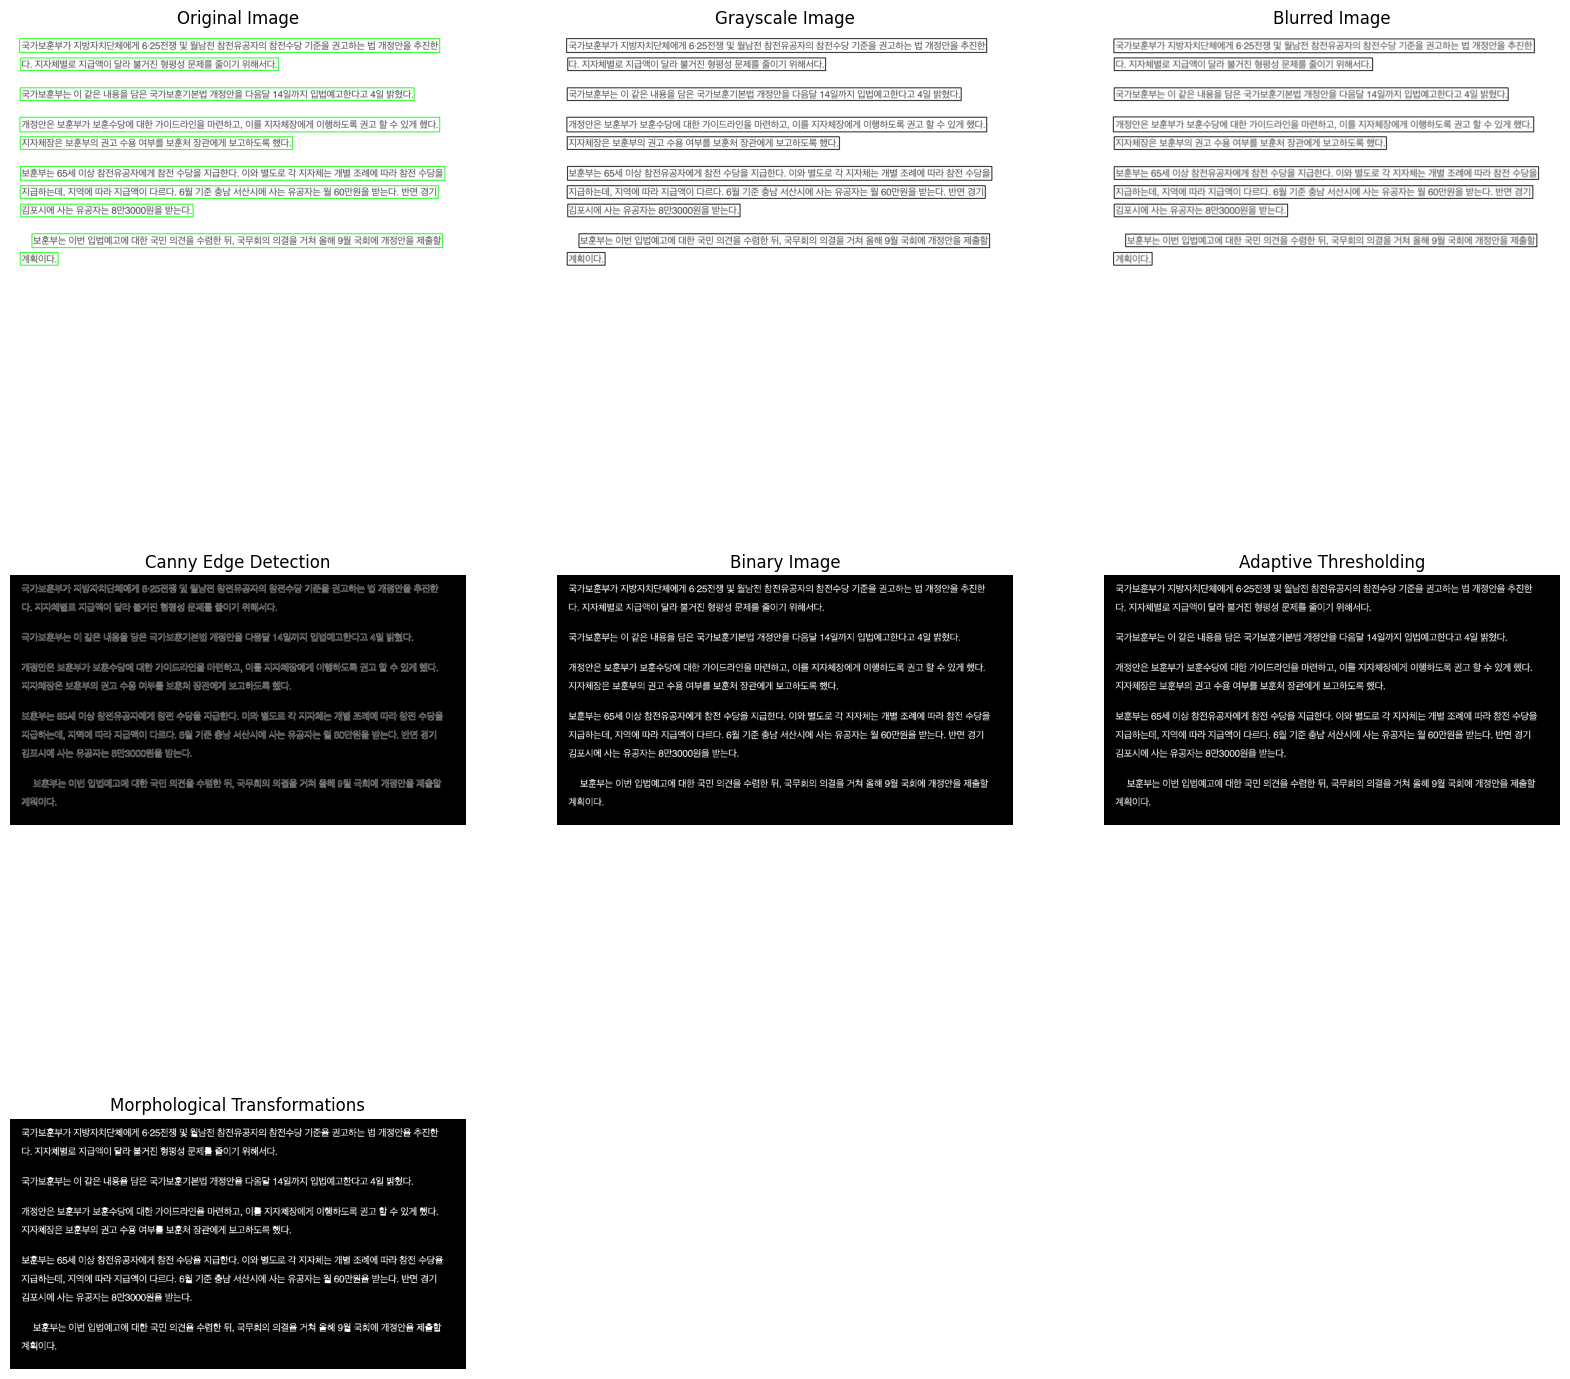

In [43]:
import cv2
import easyocr
import matplotlib.pyplot as plt


# OpenCV를 사용하여 이미지 읽기 (기본적으로 BGR 형식)
image_bgr = cv2.imread(img_path)

# Grayscale 변환
gray = cv2.cvtColor(image_bgr, cv2.COLOR_BGR2GRAY)

# 여러 전처리 기법 시도

# 1. Gaussian Blur 적용
blurred = cv2.GaussianBlur(gray, (5, 5), 0)

# 2. Canny Edge Detection
edged = cv2.Canny(blurred, 75, 200)

# 3. 이진화 (Thresholding)
_, binary_image = cv2.threshold(gray, 128, 255, cv2.THRESH_BINARY_INV + cv2.THRESH_OTSU)

# 4. Adaptive Thresholding
adaptive_thresh = cv2.adaptiveThreshold(gray, 255, cv2.ADAPTIVE_THRESH_GAUSSIAN_C, cv2.THRESH_BINARY_INV, 11, 2)

# 5. Morphological Transformations
kernel = cv2.getStructuringElement(cv2.MORPH_RECT, (3, 3))
morph_image = cv2.morphologyEx(adaptive_thresh, cv2.MORPH_CLOSE, kernel)

# EasyOCR 리더 초기화 (예: 영어와 한국어 지원)
reader = easyocr.Reader(['en', 'ko'], gpu=False)

# EasyOCR을 사용하여 텍스트 인식 (여러 전처리된 이미지들을 사용)
result_original = reader.readtext(image_bgr)
result_gray = reader.readtext(gray)
result_blurred = reader.readtext(blurred)
result_edged = reader.readtext(edged)
result_binary = reader.readtext(binary_image)
result_adaptive = reader.readtext(adaptive_thresh)
result_morph = reader.readtext(morph_image)

# 텍스트와 위치를 원본 이미지에 표시
for (bbox, text, prob) in result_original:
    (top_left, top_right, bottom_right, bottom_left) = bbox
    cv2.rectangle(image_bgr, tuple(map(int, top_left)), tuple(map(int, bottom_right)), (0, 255, 0), 2)
    print(f"Original: {text}")

for (bbox, text, prob) in result_gray:
    (top_left, top_right, bottom_right, bottom_left) = bbox
    cv2.rectangle(gray, tuple(map(int, top_left)), tuple(map(int, bottom_right)), (0, 255, 0), 2)
    print(f"Grayscale: {text}")

for (bbox, text, prob) in result_blurred:
    (top_left, top_right, bottom_right, bottom_left) = bbox
    cv2.rectangle(blurred, tuple(map(int, top_left)), tuple(map(int, bottom_right)), (0, 255, 0), 2)
    print(f"Blurred: {text}")

for (bbox, text, prob) in result_edged:
    (top_left, top_right, bottom_right, bottom_left) = bbox
    cv2.rectangle(edged, tuple(map(int, top_left)), tuple(map(int, bottom_right)), (0, 255, 0), 2)
    print(f"Edged: {text}")

for (bbox, text, prob) in result_binary:
    (top_left, top_right, bottom_right, bottom_left) = bbox
    cv2.rectangle(binary_image, tuple(map(int, top_left)), tuple(map(int, bottom_right)), (0, 255, 0), 2)
    print(f"Binary: {text}")

for (bbox, text, prob) in result_adaptive:
    (top_left, top_right, bottom_right, bottom_left) = bbox
    cv2.rectangle(adaptive_thresh, tuple(map(int, top_left)), tuple(map(int, bottom_right)), (0, 255, 0), 2)
    print(f"Adaptive: {text}")

for (bbox, text, prob) in result_morph:
    (top_left, top_right, bottom_right, bottom_left) = bbox
    cv2.rectangle(morph_image, tuple(map(int, top_left)), tuple(map(int, bottom_right)), (0, 255, 0), 2)
    print(f"Morphological: {text}")

# 이미지를 matplotlib을 사용하여 표시
plt.figure(figsize=(20, 20))

plt.subplot(3, 3, 1)
plt.title('Original Image')
plt.imshow(cv2.cvtColor(image_bgr, cv2.COLOR_BGR2RGB))
plt.axis('off')

plt.subplot(3, 3, 2)
plt.title('Grayscale Image')
plt.imshow(gray, cmap='gray')
plt.axis('off')

plt.subplot(3, 3, 3)
plt.title('Blurred Image')
plt.imshow(blurred, cmap='gray')
plt.axis('off')

plt.subplot(3, 3, 4)
plt.title('Canny Edge Detection')
plt.imshow(edged, cmap='gray')
plt.axis('off')

plt.subplot(3, 3, 5)
plt.title('Binary Image')
plt.imshow(binary_image, cmap='gray')
plt.axis('off')

plt.subplot(3, 3, 6)
plt.title('Adaptive Thresholding')
plt.imshow(adaptive_thresh, cmap='gray')
plt.axis('off')

plt.subplot(3, 3, 7)
plt.title('Morphological Transformations')
plt.imshow(morph_image, cmap='gray')
plt.axis('off')

plt.show()
